(4, 2)
Collision: True


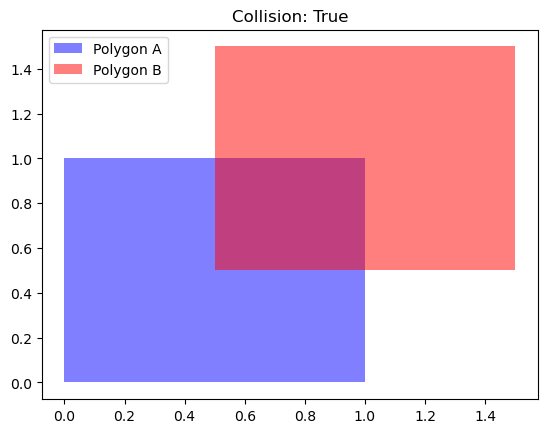

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_faces(polygon):
    """
    获取多边形的边（面）。
    """
    faces = np.column_stack([polygon, np.roll(polygon, -1, axis=0)])
    return faces

def get_normals(faces):
    """
    获取边的法线。
    """
    edge_vectors = faces[:, 2:] - faces[:, :2]
    normals = np.column_stack([-edge_vectors[:, 1], edge_vectors[:, 0]])
    normals = normals / np.linalg.norm(normals, axis=1, keepdims=True)
    return normals

def check_collision(polygon_a, polygon_b):
    """
    检查两个2D多边形之间是否发生碰撞。每次只处理一组多边形。
    """
    # 获取两个多边形的边
    faces_a = get_faces(polygon_a)
    faces_b = get_faces(polygon_b)
    
    # 合并边并获取法线
    faces = np.concatenate([faces_a, faces_b], axis=0)
    normals = get_normals(faces)
    
    # 将多边形投影到法线方向上
    polygon_a_proj = np.dot(polygon_a, normals.T)
    polygon_b_proj = np.dot(polygon_b, normals.T)
    
    # 计算投影的最小和最大值
    polygon_a_proj_min = np.min(polygon_a_proj, axis=0)
    polygon_a_proj_max = np.max(polygon_a_proj, axis=0)
    polygon_b_proj_min = np.min(polygon_b_proj, axis=0)
    polygon_b_proj_max = np.max(polygon_b_proj, axis=0)
    
    # 检查是否可分离
    not_separable = (polygon_a_proj_max > polygon_b_proj_min) & \
                    (polygon_b_proj_max > polygon_a_proj_min)
    
    # 返回碰撞结果
    return np.all(not_separable)

def plot_polygons(polygon_a, polygon_b, collision):
    """
    可视化两个多边形及其碰撞结果。
    """
    plt.figure()
    plt.fill(*zip(*np.vstack([polygon_a, polygon_a[0]])), 'b', alpha=0.5, label='Polygon A')
    plt.fill(*zip(*np.vstack([polygon_b, polygon_b[0]])), 'r', alpha=0.5, label='Polygon B')
    plt.title(f'Collision: {collision}')
    plt.legend()
    plt.show()

# 示例用法
polygon_a = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], dtype=np.float32)
polygon_b = np.array([[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]], dtype=np.float32)

print(polygon_a.shape)

collision = check_collision(polygon_a, polygon_b)
print(f"Collision: {collision}")

# 可视化结果
plot_polygons(polygon_a, polygon_b, collision)

In [4]:
tp_id = 1
critical_frames = {2: 1}

if tp_id not in critical_frames.keys():
    critical_frames[tp_id] = 114514

print(critical_frames[tp_id])


114514


In [5]:
import numpy as np
def line_intersection(p1, p2, p3, p4):
        """
        计算两条线段的交点
        
        Args:
            p1, p2: 第一条线段的端点
            p3, p4: 第二条线段的端点
            
        Returns:
            交点坐标，如果没有交点则返回None
        """
        # 线段表示：p1 + t1(p2-p1) = p3 + t2(p4-p3)
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        x4, y4 = p4
        
        # 计算分母
        denom = (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)
        print(denom)
        
        # 如果分母为0，则线段平行或共线
        if abs(denom) < 1e-8:
            return None
        
        # 计算参数 t1 和 t2
        ua = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / denom
        ub = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / denom
        
        # 检查交点是否在两条线段上
        # if 0 <= ua <= 1 and 0 <= ub <= 1:
        #     # 计算交点坐标
        #     x = x1 + ua * (x2 - x1)
        #     y = y1 + ua * (y2 - y1)
        #     return np.array([x, y])

        x = x1 + ua * (x2 - x1)
        y = y1 + ua * (y2 - y1)
        return np.array([x, y])

traj_i = np.array([[664.68457031, 193.16384888],
                   [664.7354126 , 192.31735229]])
traj_j = np.array([[617.01959229, 148.52093506],
                   [617.79290771, 147.88417053]])
intersection = line_intersection(traj_i[0], traj_i[1], traj_j[0], traj_j[1])
print(intersection)

0.6222342991284542
[669.98540977 104.90774308]


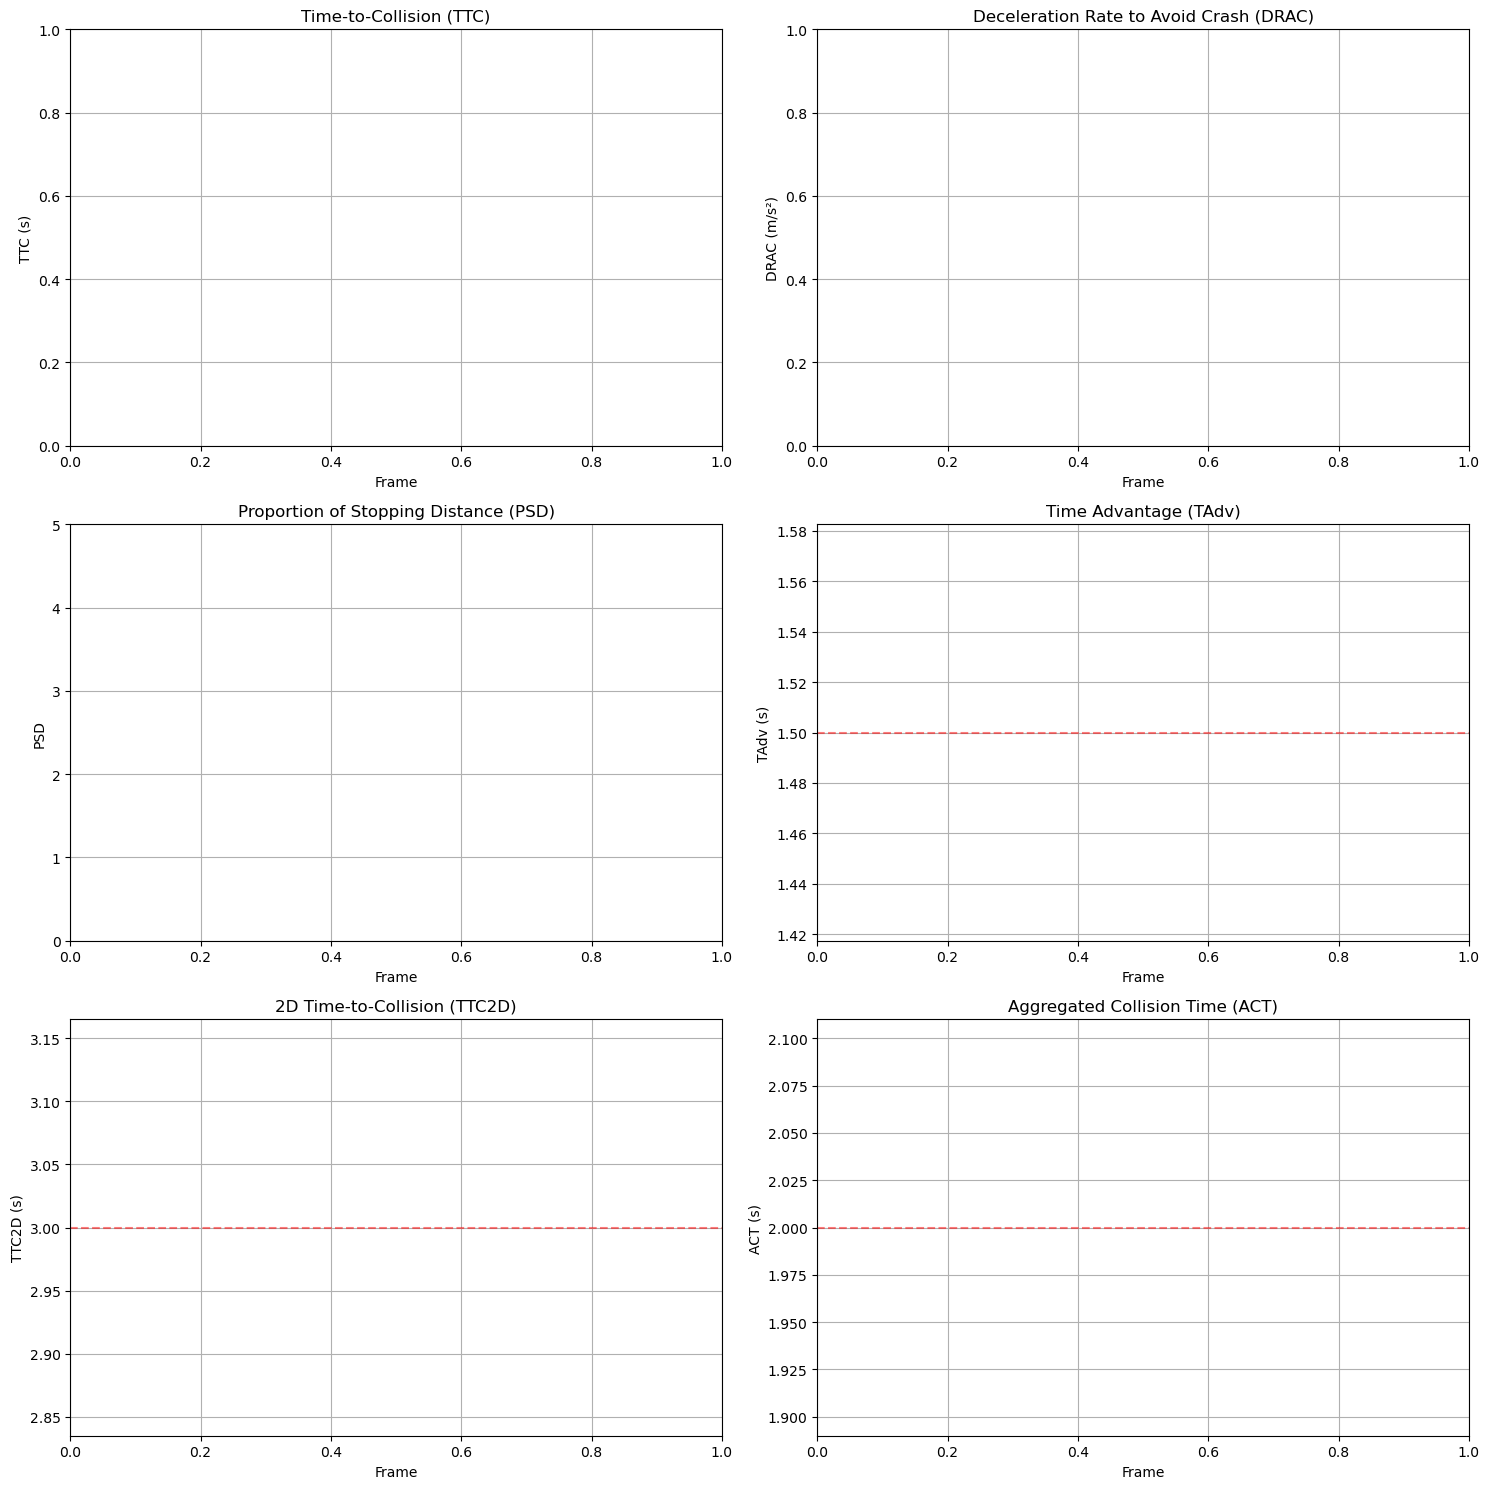

In [4]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title(f"Time-to-Collision (TTC)")
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('TTC (s)')
axs[0, 0].grid(True)
# Add vertical lines for anomaly frames
# axs[0, 0].axvline(x=min(safety_metrics['anomaly_frames']), color='gray', linestyle='--', alpha=0.3)
# axs[0, 0].axvline(x=max(safety_metrics['anomaly_frames']), color='gray', linestyle='--', alpha=0.3)
# axs[0, 0].scatter(safety_metrics['anomaly_frames'], safety_metrics['ttc_values'][tp_id][safety_metrics['anomaly_frames']], 
#                 color='red', marker='x', s=100, label=f'Anomaly (tp_id={tp_id})')
    
# 绘制DRAC
axs[0, 1].set_title(f"Deceleration Rate to Avoid Crash (DRAC)")
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('DRAC (m/s²)')
axs[0, 1].grid(True)
# 绘制PSD
axs[1, 0].set_title(f"Proportion of Stopping Distance (PSD)")
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('PSD')
axs[1, 0].grid(True)
axs[1, 0].set_ylim(0, 5)  # 设置y轴范围为0-5
# 绘制TAdv
axs[1, 1].set_title(f'Time Advantage (TAdv)')
axs[1, 1].set_xlabel('Frame')
axs[1, 1].set_ylabel('TAdv (s)')
axs[1, 1].grid(True)
axs[1, 1].axhline(y=1.5, color='r', linestyle='--', alpha=0.5)
# axs[1, 1].text(df['frame_id'].iloc[0], 2.0, 'Critical threshold (1.5s)', color='r', alpha=0.7)

# 绘制TTC2D
axs[2, 0].set_title(f'2D Time-to-Collision (TTC2D)')
axs[2, 0].set_xlabel('Frame')
axs[2, 0].set_ylabel('TTC2D (s)')
axs[2, 0].grid(True)
axs[2, 0].axhline(y=3.0, color='r', linestyle='--', alpha=0.5)
# axs[2, 0].text(df['frame_id'].iloc[0], 3.5, 'Critical threshold (3s)', color='r', alpha=0.7)

# 绘制ACT
axs[2, 1].set_title(f'Aggregated Collision Time (ACT)')
axs[2, 1].set_xlabel('Frame')
axs[2, 1].set_ylabel('ACT (s)')
axs[2, 1].grid(True)
axs[2, 1].axhline(y=2.0, color='r', linestyle='--', alpha=0.5)
# axs[2, 1].text(df['frame_id'].iloc[0], 2.5, 'Critical threshold (2s)', color='r', alpha=0.7)

plt.tight_layout()
plt.show()